# This is a demonstration of Jupyter notebooks capabilities. We will look at how to use this notebook to analyze LAMMPS thermostat and trajectories.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import display, HTML
import matplotlib as mpl

**pandas** is a data_analysis library that gives useful data structures. It can do time series data, or large *dataframes* with columns of different data, and even multi-leveled indexing of data.

**matplotlib** is a plotting library, which can do lots of awesome stuff, including animations and live plotting. Other options for python plotting libraries I've seen are **Bokeh** and **plotly**; each has it's strengths and weaknesses.

One **_benefit_** to using _jupyter notebooks_ is the ability to use **Markdown**

It allows you to write _equations_ like

$$y = mx_i + b + \delta y_i $$

using ${\LaTeX}$ like commands

# Pandas intro

Let's start by analyzing a finished LAMMPS run. Let's look at the Thermostat data first

In [2]:
def create_dframe(datafile):
    header = 0
    footer = 0
    # To generate a pandas dataframe from the data in the LAMMPS thermostat, we need to pick out the lines with the data.
    # pandas can read data from a .csv and we can tell it to ingnore a number of lines of header and footer.

    with open(datafile) as f:  # this opens a file as a file object called f, which we can then loop over
        header_check = True
        footer_check = False
        for line in f:
            if line.startswith('Loop time'):
                footer_check = True
            if header_check:
                if line.startswith('Step'):
                    header_check = False
                else:
                    header += 1
            if footer_check:
                footer += 1
    # now that we know what to ignore, creating a dataframe is as easy as
    data = pd.read_csv(datafile, delim_whitespace=True, skiprows=header, engine='python', skipfooter=footer, index_col=0)
    return data

In [3]:
datafile = '/home/sether35/jupyter_tutorial/LAMMPS_sim/alumina_example/REAX_interface_frozen_solid.o5239331'
data = create_dframe(datafile)
data

,Temp,c_liqtemp,TotEng,PotEng,Press
Step,,,,,
0,333.89545,1043.00000,-111.00245,-111.99761,40008.11500
50,1550.20760,4849.31510,-111.63538,-116.25571,22023.91400
100,1056.74010,3305.06280,-112.82740,-115.97697,19066.70700
150,856.72504,2679.13770,-113.64865,-116.20208,15773.89000
200,722.09836,2257.83830,-114.30667,-116.45885,11650.61200
250,617.87133,1931.67130,-114.82451,-116.66605,8419.22750
300,536.33766,1676.52060,-115.23320,-116.83173,6015.67030
350,475.00042,1484.57250,-115.55796,-116.97368,4218.03050
400,424.07719,1325.21380,-115.81598,-117.07992,2849.91010


pandas can show you your whole dataframe, or you can ask it about specific pieces

In [4]:
data.loc[slice(700,1000),('c_liqtemp','Press')]

,c_liqtemp,Press
Step,,
700,1001.2998,-3434.6322
750,1006.1291,-3611.4418
800,1017.0652,-3578.7506
850,1040.2112,-3530.7653
900,1049.6983,-3394.0501
950,1056.3725,-2868.1198
1000,1044.3428,-2354.6377


Pandas can plot as well

<IPython.core.display.Javascript object>


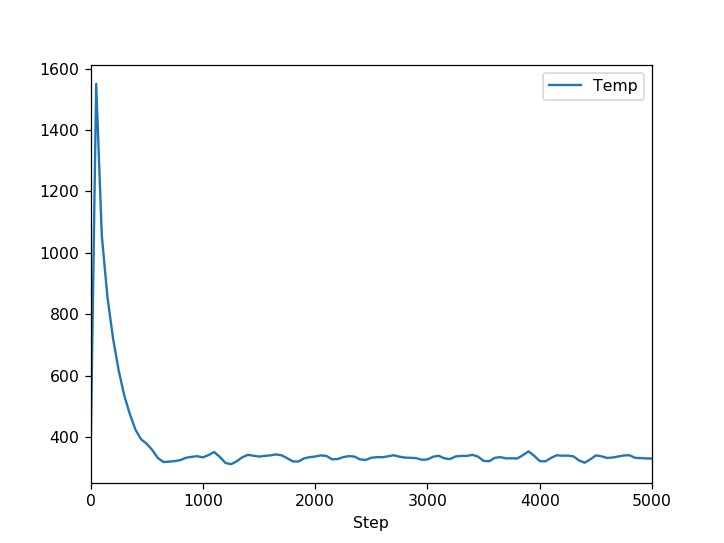

In [5]:
data.plot(y='Temp')
plt.show()

In [6]:
data.describe()  # pandas also can give a brief statistical overview

,Temp,c_liqtemp,TotEng,PotEng,Press
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,370.070466,1156.205729,-116.588616,-117.691596,-568.870989
std,156.675666,490.299266,0.998344,0.697112,5834.866969
min,312.099590,974.792230,-117.047090,-118.028710,-4160.380500
25%,330.829420,1033.405200,-116.970770,-117.956160,-2624.844300
50%,335.238630,1047.203300,-116.891580,-117.891120,-1911.739500
75%,340.722650,1064.365000,-116.726840,-117.742730,-1082.328900
max,1550.207600,4849.315100,-111.002450,-111.997610,40008.115000


<IPython.core.display.Javascript object>


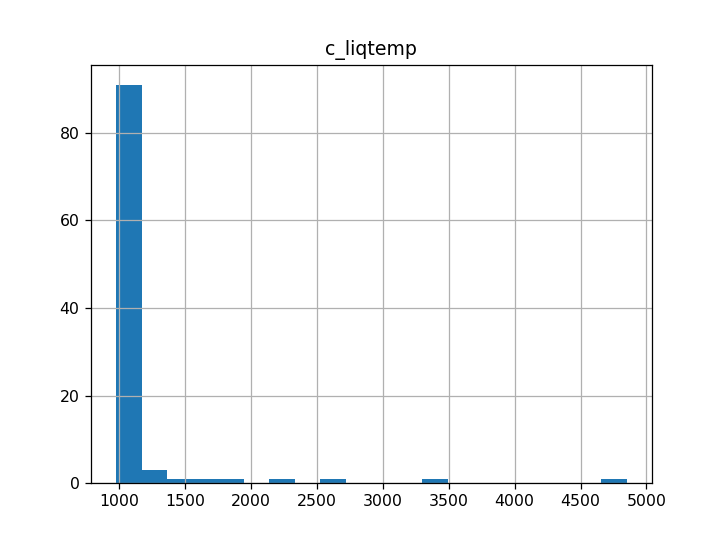

In [7]:
# pandas also can easily plot for slices of a dataframe
data.loc[slice(None),:].hist('c_liqtemp',bins=20)
plt.show()

The backend that pandas uses for visualization is *matplotlib*. Matplotlib is a versatile and highly customizable plotting library. you can create stacked figures, figures with insets, and even 3d plots. Matplotlib can also do animations.

<IPython.core.display.Javascript object>


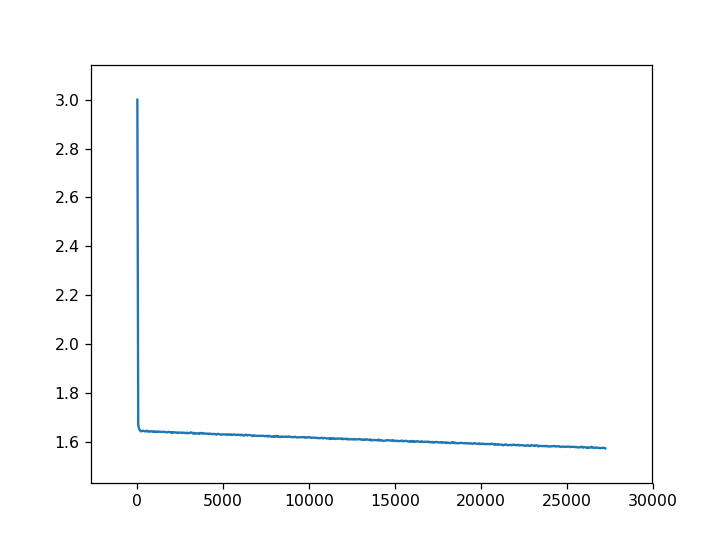

In [8]:
datafile = '/home/sether35/jupyter_tutorial/LAMMPS_sim/melt/Melt_example.o5286233'

rc('animation', html='html5')
fig = plt.figure()  
ax = fig.add_subplot(111)
line, = ax.plot([],[])


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    data = create_dframe(datafile)
    datalength = 100
    x = data.index.values
    y = data.loc[slice(None),'Temp'].values
#    x = data.index.values[-datalength:]
#    y = data.loc[slice(None),'Temp'].values[-datalength:]
    dx = x.max()-x.min()
    dy = y.max()-y.min()
#    ax.set_xlim(x.min(),x.max())
    ax.set_xlim(x.min()-.1*dx,x.max()+.1*dx)
    ax.set_ylim(y.min()-.1*dy,y.max()+.1*dy)
    line.set_data(x, y)
    return line,


anim = animation.FuncAnimation(fig, animate, init_func=init, interval=100, blit=True)

In [9]:
%magic